### Netflix Stock Market Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### Predic Close Price

In [3]:
# 'Date' is the datetime column and 'Close' is the closing price
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df[['Close']]

### Normalize the Data and Train Test Split

In [4]:
from sklearn.preprocessing import MinMaxScaler

#Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

#split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

### Create Sequence for LSTM

In [5]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

sequence_length = 10 #You can adjust this based on your preference
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

##### Build and Train the LSTM Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer= 'adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0487
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Mean Squared Error: 777.7155294719887


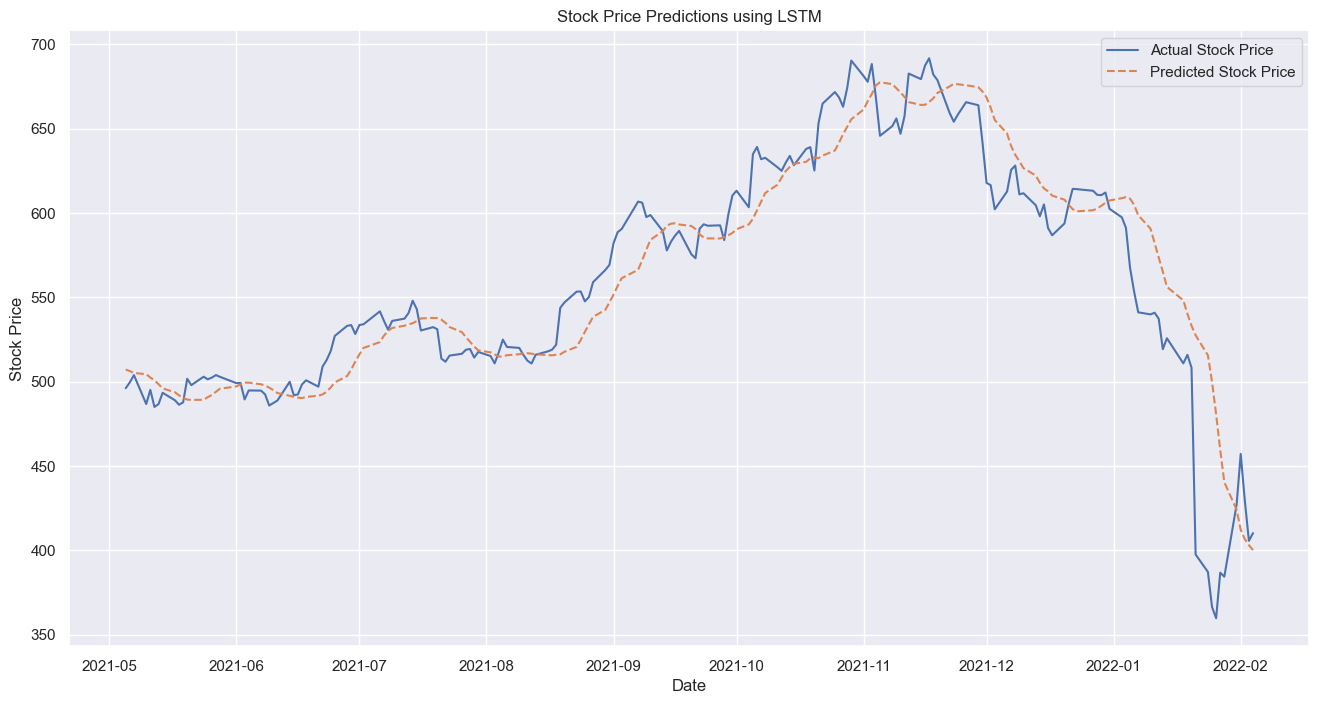

In [7]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

#Evaluate the model (you can use various metrics depending on your requirements)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]['Close'], predictions)
print(f'Mean Squared Error: {mse}')

#Plot the predictions
plt.figure(figsize=(16,8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]['Close'], label='Actual Stock Price')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Stock Price', linestyle= 'dashed')
plt.title('Stock Price Predictions using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

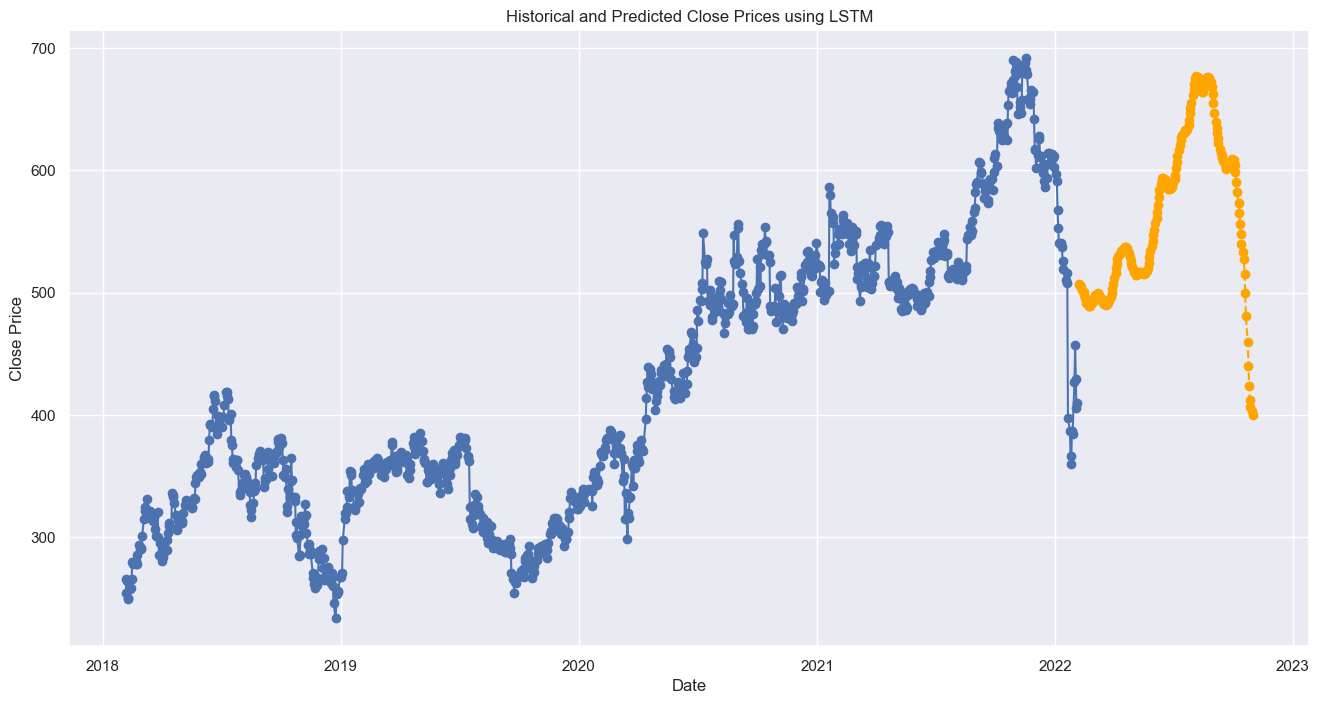

In [8]:
#Update the column name used for close prices
Close_price_column = 'Close' #Replace with teh correct column name 'Close'

#Plot the historical Close prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, df[Close_price_column], label='Historical Close Price', marker='o', linestyle='-', color='b')

#plot the predicted close prices
predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Close Price', linestyle='dashed', color='orange', marker='o')

plt.title('Historical and Predicted Close Prices using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend
plt.show()